In [1]:
import os
import sys
from scipy import sparse
from scipy import sparse, io
import pdb


import numpy as np
import pickle
from sklearn.decomposition import NMF, non_negative_factorization, TruncatedSVD
from sklearn.decomposition._nmf import _beta_divergence


script_dir = "../"
sys.path.append(os.path.abspath(script_dir))
from factorize import *
from misc import *
from findK_correction_jk import *

In [10]:
def simulate_multinomial_counts_local(L, F, s, seed = 123):
    np.random.seed(seed)
    n = L.shape[0]
    p = F.shape[0]
    Prob = L.dot(F.T)
    X = np.empty(shape = (n, p))
    for i in range(n):
        X[i,] = np.random.multinomial(s[i], Prob[i,], size = 1).astype(int)

    return X

In [4]:
data_dir="../dataset/real_bows"
data_name="nips"
X = io.mmread(f"{data_dir}/{data_name}_X.mtx").astype(float).toarray()
C = np.loadtxt(f"{data_dir}/{data_name}_C.csv", delimiter=',')

In [16]:
%%capture

k = 6
model = NMF(n_components=k, init='nndsvda', random_state=0,
            beta_loss='kullback-leibler', solver='mu', max_iter=100, verbose = True, tol=1e-30)
W = model.fit_transform(X) 
H = model.components_

F, L = poisson2multinom(L = W.copy(), F = H.T.copy())
s = X.sum(axis = 0)

X_sim = simulate_multinomial_counts_local(L, F, s)
C_sim = compute_C_unbiased(X_sim)

In [39]:
C_rec, values, elapsedTime = rectifyC(C, 3*k, "AP")
C_sim_rec, values, elapsedTime = rectifyC(C_sim, 3*k, "AP")

+ Start alternating projection
+ Finish alternating projection
  - Elapsed seconds = 26.5590

+ Start alternating projection
+ Finish alternating projection
  - Elapsed seconds = 26.2363



In [55]:
C.max()

0.0001844681161266687

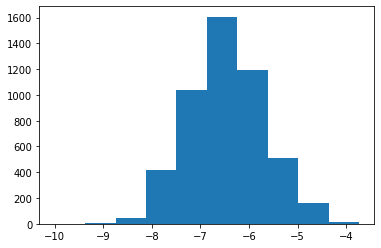

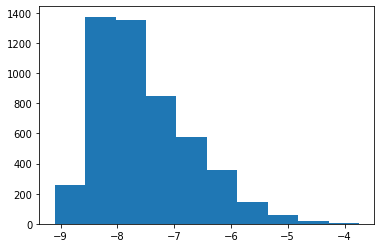

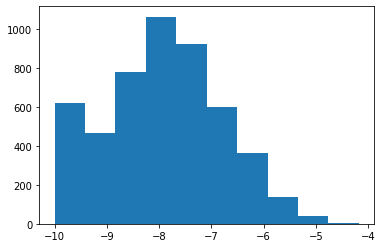

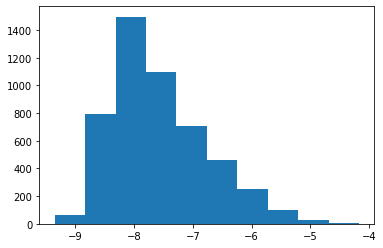

In [57]:
eps = 1e-10

C_tmp = C.copy()
C_tmp[C_tmp < eps] = eps
plt.hist(np.log10(np.diag(C_tmp)))
plt.show()

C_tmp = C_rec.copy()
C_tmp[C_tmp < eps] = eps
plt.hist(np.log10(np.diag(C_tmp)))
plt.show()

C_tmp = C_sim.copy()
C_tmp[C_tmp < eps] = eps
plt.hist(np.log10(np.diag(C_tmp)))
plt.show()

C_tmp = C_sim_rec.copy()
C_tmp[C_tmp < eps] = eps
plt.hist(np.log10(np.diag(C_tmp)))
plt.show()

In [25]:
w,v = np.linalg.eig(C)
w2,v2 = np.linalg.eig(C_sim)

In [40]:
w3,v3 = np.linalg.eig(C_rec)
w4,v4 = np.linalg.eig(C_sim_rec)

In [45]:
w = w.real
w2 = w2.real
w3 = w3.real
w4 = w4.real

In [46]:
print((w.min(), w.max()))
print((w2.min(), w2.max()))
print((w3.min(), w3.max()))
print((w4.min(), w4.max()))

(-9.63095363931585e-07, 0.0007309010724020305)
(-3.993326257357038e-06, 0.0007141843361879712)
(-3.025628506123583e-07, 0.0007346265431350955)
(-4.048940166578285e-08, 0.0007140768227186615)


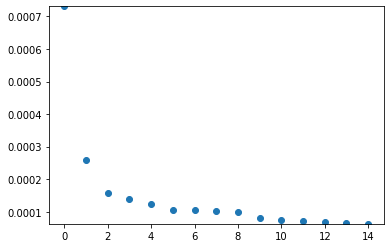

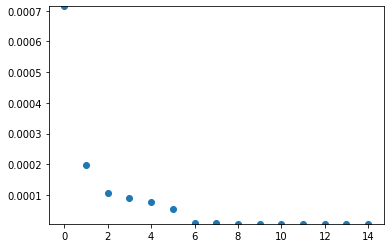

(-3.025628506123583e-07, 0.0007346265431350955)


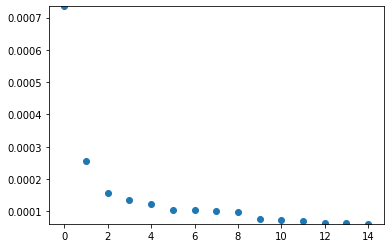

(-4.048940166578285e-08, 0.0007140768227186615)
(6.6407449325649716e-06, 0.0007140768227186615)


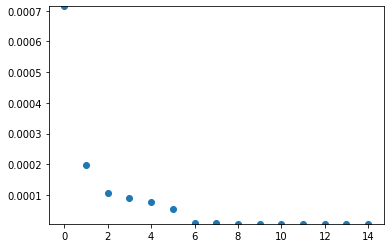

In [51]:
n_top = 15

w_tmp = w.copy()
idx = np.argsort(-np.abs(w_tmp))[:n_top]
x = [i for i in range(n_top)]
plt.scatter(x, -np.sort(-w_tmp[idx]))
plt.ylim((w_tmp[idx].min(), w_tmp[idx].max()))
plt.show()

w_tmp = w2.copy()
idx = np.argsort(-np.abs(w_tmp))[:n_top]
x = [i for i in range(n_top)]
plt.scatter(x, -np.sort(-w_tmp[idx]))
plt.ylim((w_tmp[idx].min(), w_tmp[idx].max()))
plt.show()



w_tmp = w3.copy()
print((w_tmp.min(), w_tmp.max()))
idx = np.argsort(-np.abs(w_tmp))[:n_top]
x = [i for i in range(n_top)]
plt.scatter(x, -np.sort(-w_tmp[idx]))
plt.ylim((w_tmp[idx].min(), w_tmp[idx].max()))
plt.show()

w_tmp = w4.copy()
print((w_tmp.min(), w_tmp.max()))
idx = np.argsort(-np.abs(w_tmp))[:n_top]
x = [i for i in range(n_top)]
plt.scatter(x, -np.sort(-w_tmp[idx]))
print((w_tmp[idx].min(), w_tmp[idx].max()))
plt.ylim((w_tmp[idx].min(), w_tmp[idx].max()))
plt.show()



